In [124]:
from PIL import Image
from scipy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np
image=Image.open('./timg.jpg')
A=np.array(image)


In [125]:
print(A.shape)
print(image)

(281, 500, 3)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x281 at 0x2C4313ACA90>


<function matplotlib.pyplot.show(*args, **kw)>

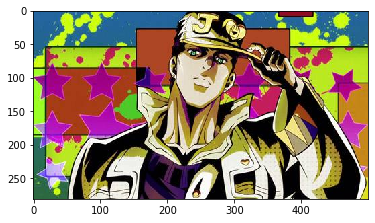

In [126]:
plt.imshow(A)
plt.show

In [134]:
u_r, sigma_r, v_r = svd(A[:, :, 0],full_matrices=False)
u_g, sigma_g, v_g = svd(A[:, :, 1],full_matrices=False)
u_b, sigma_b, v_b = svd(A[:, :, 2],full_matrices=False)
print(sigma_r.shape)

(281,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


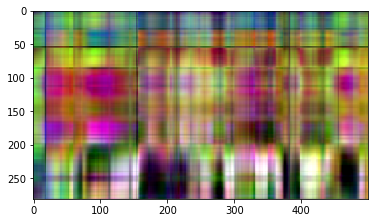

In [138]:
def SVDreconsturct(s,p,q,k):
   s_temp=np.zeros(s.shape[0])
   s_temp[0:k]=s[0:k]
   s=s_temp*np.identity(s.shape[0])
   temp=np.dot(p,s)
   temp=np.dot(temp,q)
   return temp

def get_image_feature(k):
   R=SVDreconsturct(sigma_r,u_r,v_r,k)
   G=SVDreconsturct(sigma_g,u_g,v_g,k)
   B=SVDreconsturct(sigma_b,u_b,v_b,k)
   image=np.stack((R, G, B), axis = 2)
   image=image/255
   A=np.array(image)

   plt.imshow(A)
   

    
    
get_image_feature(round(sigma_r.shape[0]*0.01))


    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


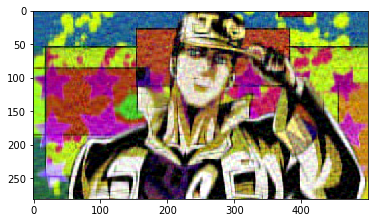

In [139]:
get_image_feature(round(sigma_r.shape[0]*0.1))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


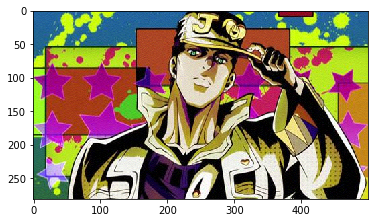

In [140]:

get_image_feature(round(sigma_r.shape[0]*0.5))